In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
df=pd.read_csv('Prostate_Cancer.csv')
df

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...,...
95,96,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,B,22,14,78,451,0.105,0.071,0.190,0.066
97,98,B,19,27,62,295,0.102,0.053,0.135,0.069
98,99,B,21,24,74,413,0.090,0.075,0.162,0.066


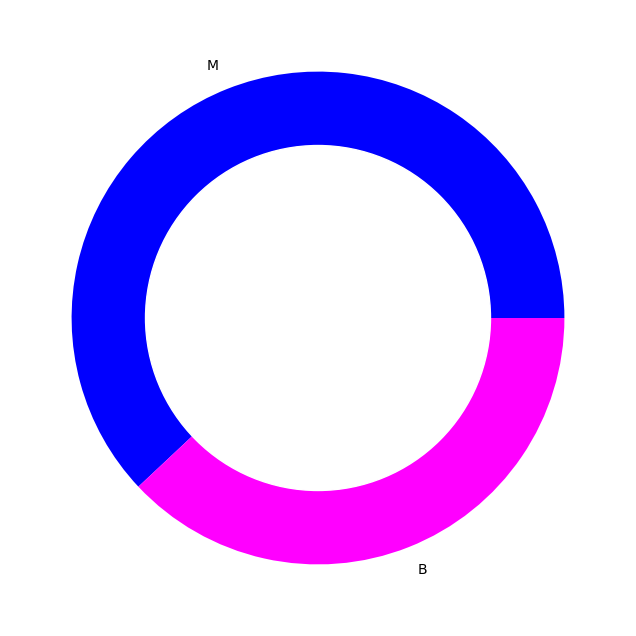

In [3]:
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(df.diagnosis_result.value_counts(), labels=['M','B'], colors=['blue', 'magenta'])
p = plt.gcf()
p.gca().add_artist(circle)

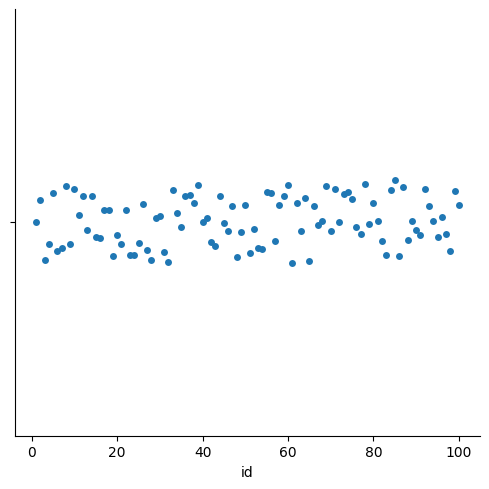

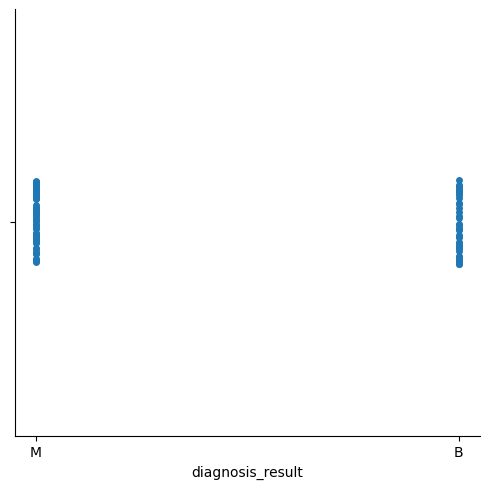

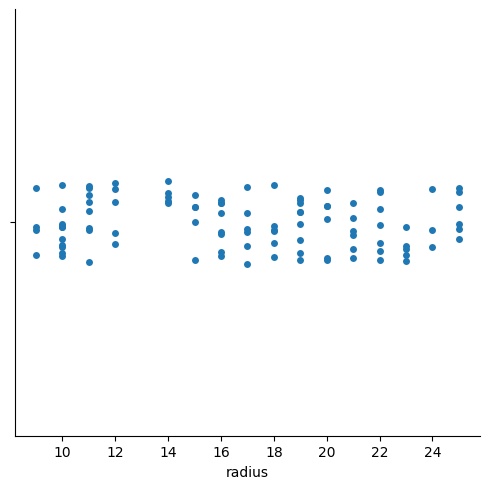

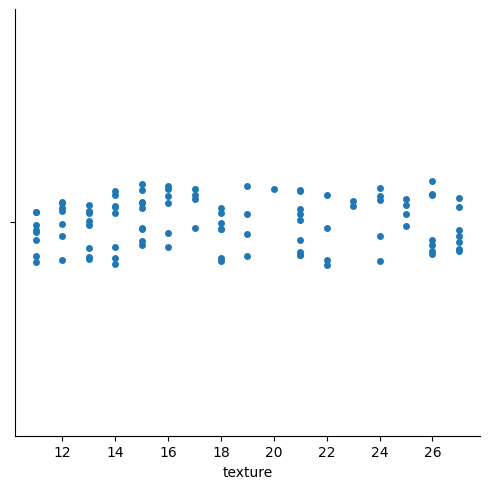

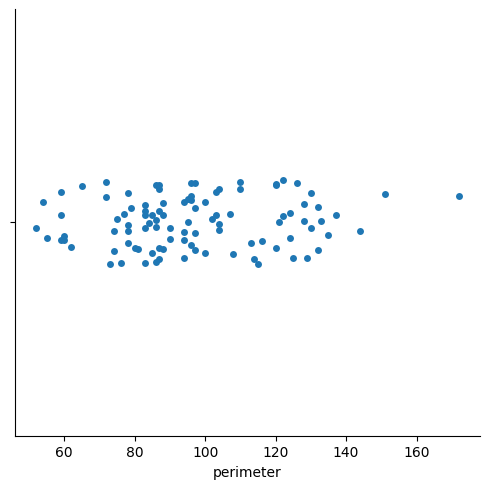

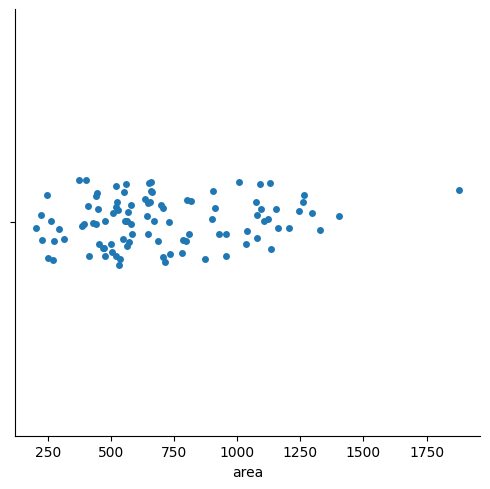

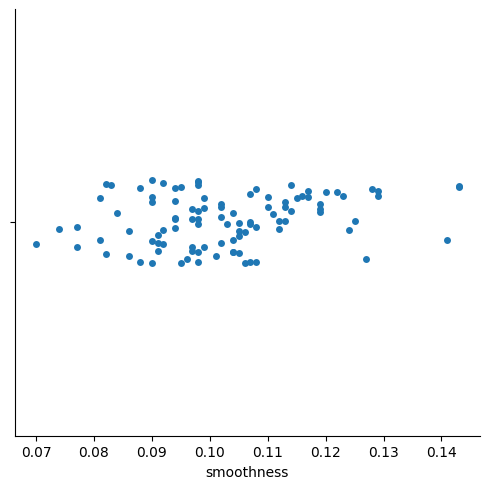

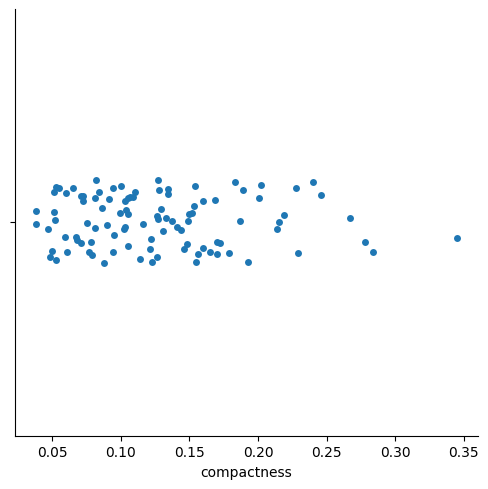

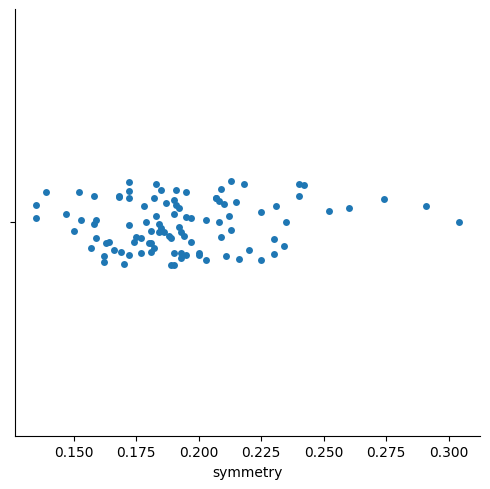

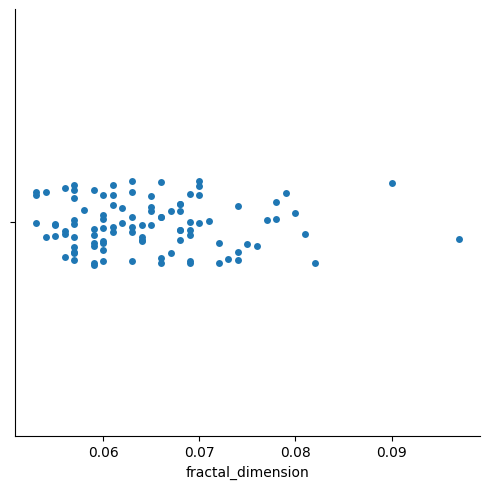

In [4]:
# cgecking for some outliers in dataset
# sns.catplot(y='diagnosis_result', x='id', data=df.sort_values("diagnosis_result", ascending=False),
#            kind='boxen', height=6, aspect=3)

for col in df.columns:
    sns.catplot(x = col, data = df)

In [7]:

# Define the number of augmented samples you want to create
num_augmented_samples = 1000  # Adjust this as needed

# Initialize an empty DataFrame to store the augmented data
augmented_data = pd.DataFrame(columns=df.columns)

# Define the range for random data modification
# You can adjust these ranges as needed
radius_range = (-5, 5)
texture_range = (-5, 5)
perimeter_range = (-10, 10)
area_range = (-100, 100)
smoothness_range = (-0.02, 0.02)
compactness_range = (-0.02, 0.02)
symmetry_range = (-0.02, 0.02)
fractal_dimension_range = (-0.01, 0.01)

for _ in range(num_augmented_samples):
    # Randomly select an existing row to modify
    original_row = df.sample(1)

    # Create a new row with random modifications
    augmented_row = original_row.copy()
    augmented_row['radius'] += np.random.uniform(*radius_range)
    augmented_row['texture'] += np.random.uniform(*texture_range)
    augmented_row['perimeter'] += np.random.uniform(*perimeter_range)
    augmented_row['area'] += np.random.uniform(*area_range)
    augmented_row['smoothness'] += np.random.uniform(*smoothness_range)
    augmented_row['compactness'] += np.random.uniform(*compactness_range)
    augmented_row['symmetry'] += np.random.uniform(*symmetry_range)
    augmented_row['fractal_dimension'] += np.random.uniform(*fractal_dimension_range)

    # Append the augmented row to the new DataFrame
    augmented_data = pd.concat([augmented_data, augmented_row], ignore_index=True)

# Concatenate the original data and the augmented data
augmented_dataset = pd.concat([df, augmented_data], ignore_index=True)

# Save the augmented dataset to a new CSV file
augmented_dataset.to_csv("augmented_dataset.csv", index=False)


In [8]:
augmented_dataset

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23.000000,12.000000,151.000000,954.000000,0.143000,0.278000,0.242000,0.079000
1,2,B,9.000000,13.000000,133.000000,1326.000000,0.143000,0.079000,0.181000,0.057000
2,3,M,21.000000,27.000000,130.000000,1203.000000,0.125000,0.160000,0.207000,0.060000
3,4,M,14.000000,16.000000,78.000000,386.000000,0.070000,0.284000,0.260000,0.097000
4,5,M,9.000000,19.000000,135.000000,1297.000000,0.141000,0.133000,0.181000,0.059000
...,...,...,...,...,...,...,...,...,...,...
1095,4,M,17.932725,13.748257,71.376876,341.783185,0.073628,0.280053,0.259868,0.104296
1096,99,B,19.385293,20.616063,79.555928,362.747740,0.090165,0.084398,0.161760,0.061674
1097,55,M,19.876866,25.985771,93.776385,714.027458,0.085320,0.083885,0.148156,0.061990
1098,50,B,28.220428,12.851827,96.532742,512.557908,0.088663,0.094995,0.180007,0.055891


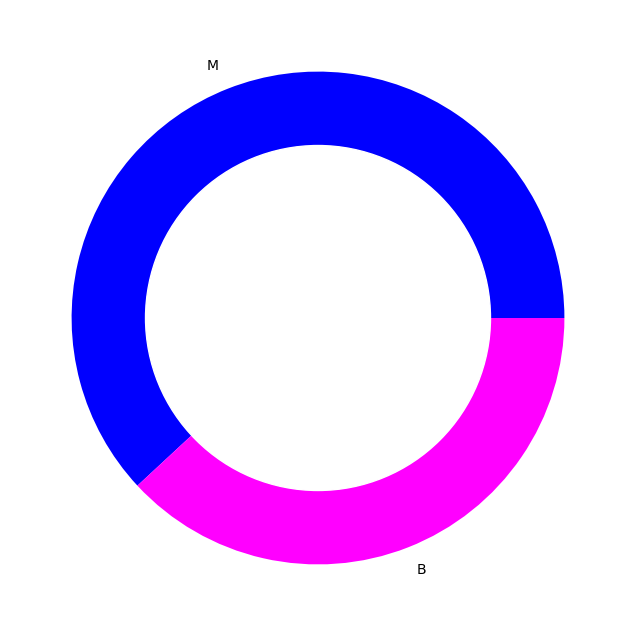

In [9]:
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(augmented_dataset.diagnosis_result.value_counts(), labels=['M','B'], colors=['blue', 'magenta'])
p = plt.gcf()
p.gca().add_artist(circle)

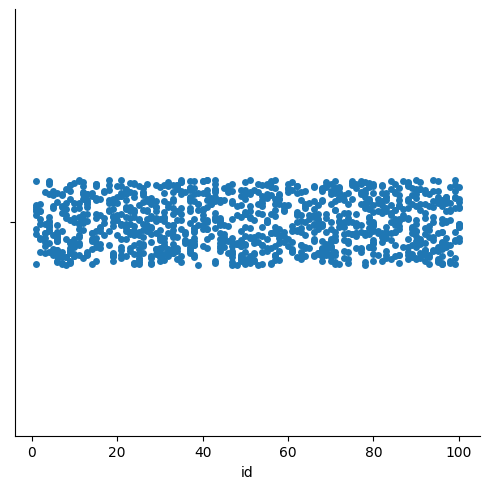

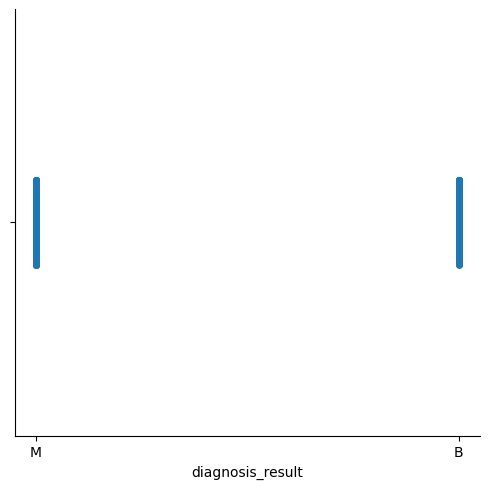

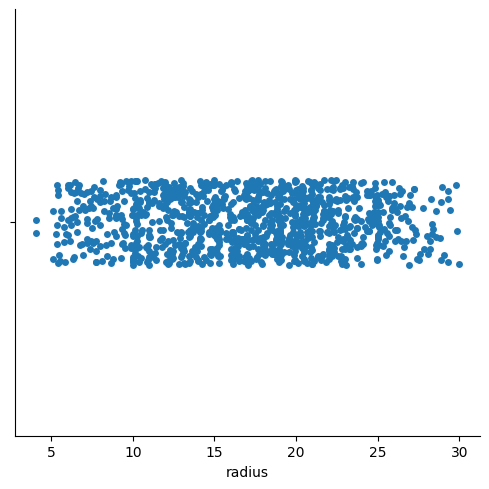

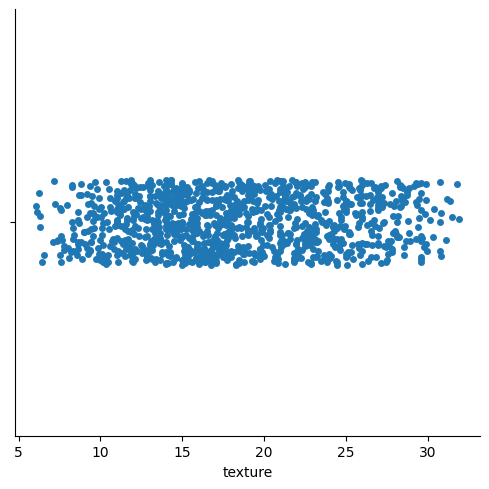

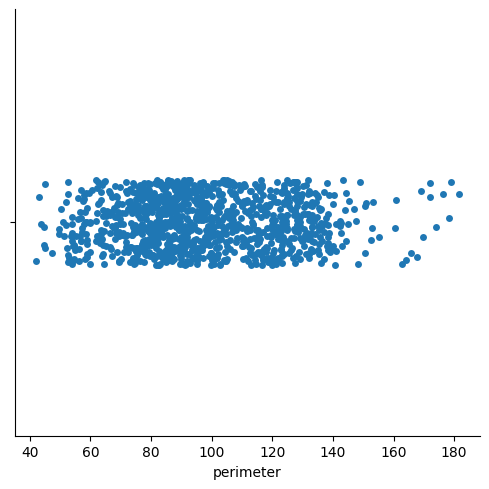

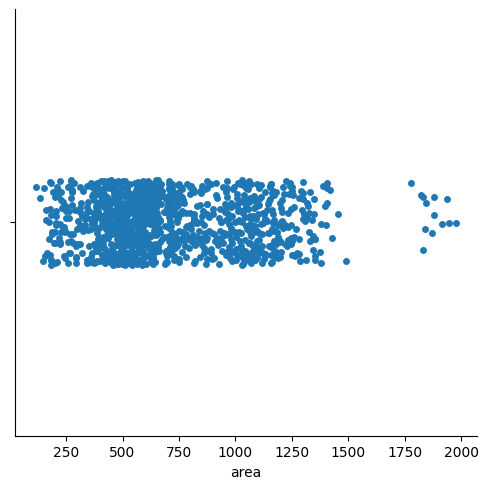

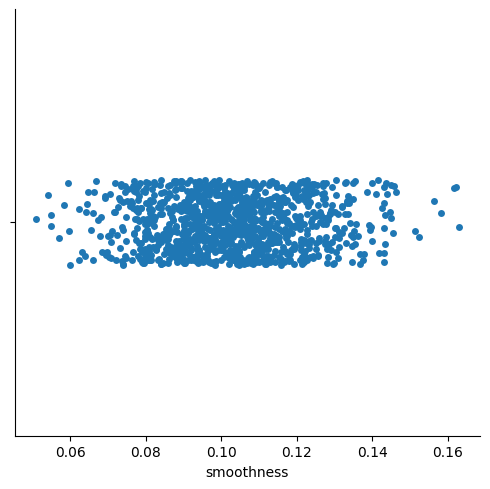

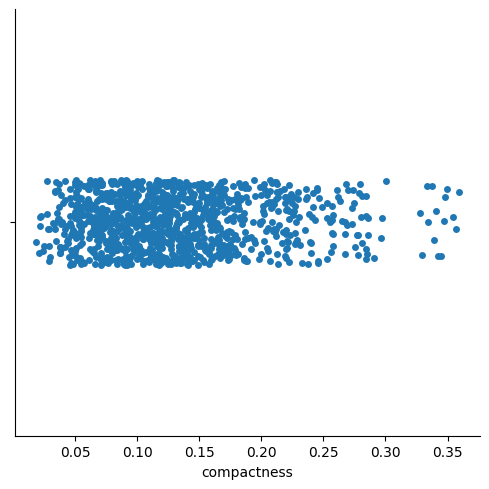

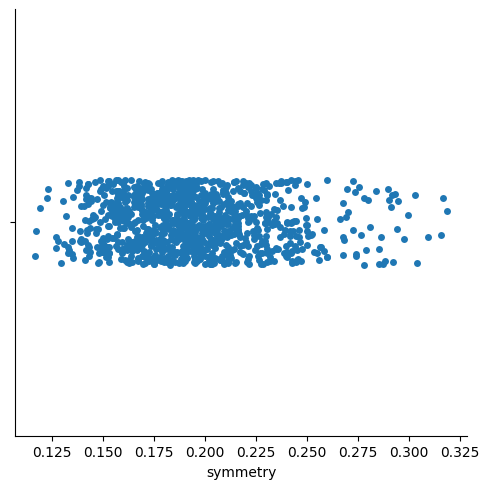

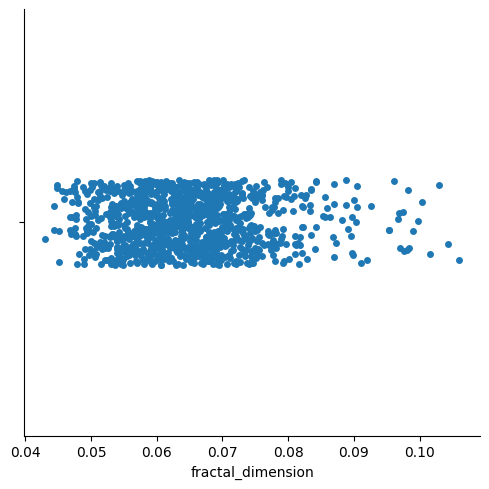

In [10]:
for col in df.columns:
    sns.catplot(x = col, data = augmented_dataset)